# The Sparks Foundation - "Data Science & Business Analytics Internship"

# GRIP : MARCH-2022

## Author : NISHU KUMARI

### BEGINNER LEVEL TASK

### TASK-1 : Prediction using Supervised Machine Learning

In this task I am supposesd to predict the precentage of a student provided his/her study hour.This is a simple linear regression task as it involves just two variables. We have data given from which I have to develope a supervised machine learning model. At last we will use different performance metrics to see how good our model predicts from unseen data.

#### Dataset Link : http://bit.ly/w-data

### Importing Libraries

In [71]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

### Loading the data

In [72]:
# Reading data from remote link
url_data = "http://bit.ly/w-data"
sl_data = pd.read_csv(url_data)
print("Data imported successfully")

sl_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [73]:
sl_data.sample(10)

,Hours,Scores
10,7.7,85
1,5.1,47
7,5.5,60
0,2.5,21
3,8.5,75
15,8.9,95
24,7.8,86
4,3.5,30
5,1.5,20
14,1.1,17


In [74]:
sl_data.columns

Index(['Hours', 'Scores'], dtype='object')

In [75]:
sl_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [76]:
sl_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [77]:
sl_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualisation

<AxesSubplot:ylabel='Scores'>

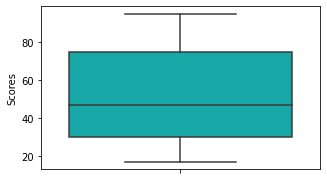

In [78]:
plt.figure(figsize=(5,3))
sns.boxplot(data=sl_data,y='Scores',color='c')

<AxesSubplot:xlabel='Hours', ylabel='count'>

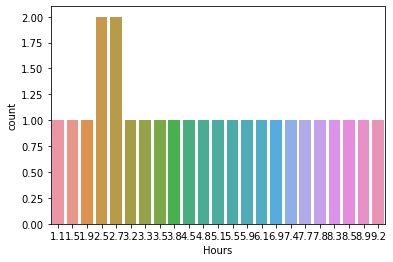

In [79]:
sns.countplot(data=sl_data,x='Hours')

<AxesSubplot:xlabel='Scores', ylabel='count'>

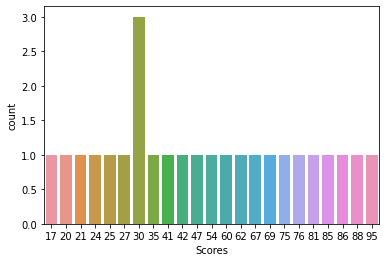

In [80]:
sns.countplot(data=sl_data,x='Scores')

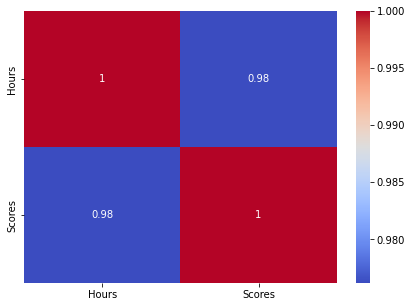

In [81]:
plt.figure(figsize=(7,5))
sns.heatmap(sl_data.corr(), annot=True,cmap='coolwarm')
plt.show()

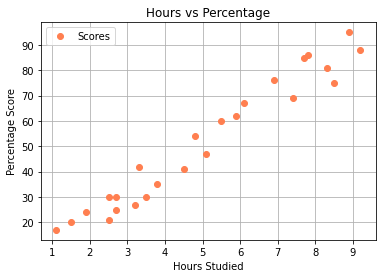

In [82]:
# Plotting the distribution of scores
sl_data.plot(x='Hours', y='Scores', style='o',color='coral')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### Data Preprocessing

In [83]:
X = sl_data.iloc[:, :-1].values  
y = sl_data.iloc[:, 1].values  

### Splitting the data

In [84]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.3, random_state=0) 

### Algorithm Training
We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [85]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Hurray! Training complete.")

Hurray! Training complete.


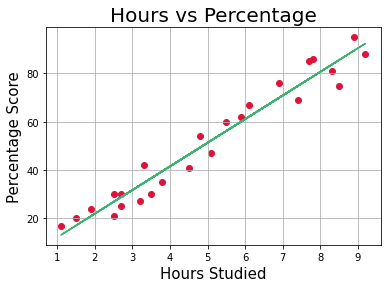

In [86]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,color='crimson')
plt.plot(X, line, c = "mediumseagreen")
plt.title('Hours vs Percentage',size=20) 
plt.xlabel('Hours Studied' ,size=15)  
plt.ylabel('Percentage Score' ,size=15) 
plt.grid()
plt.show()

### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [87]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [88]:
y_test

array([20, 27, 69, 30, 62, 35, 24, 86], dtype=int64)

In [89]:
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [90]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [91]:
# Now testing the given test data 9.25 hrs
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 92.91505723477056


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [92]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.419727808027652
Mean Squared Error: 22.96509721270043
Root Mean Squared Error: 4.792191274636315
R2: 0.9568211104435257


### Summary
The prediction model is built successfully and I was able to make prediction with less error and high accuracy score(R2)

## Thank You!!! :)